<a href="https://colab.research.google.com/github/udayameister/QuantumComputing/blob/main/Quantum_Optimization_DWave_VIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install dwave_networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 54.6 MB/s eta 0:00:00


In [2]:

import dimod  # Library for solving discrete optimization problems
import networkx as nx  # Library for creating and manipulating complex networks
import dwave_networkx as dnx  # Library for solving graph problems on D-Wave's quantum hardware
import matplotlib.pyplot as plt  # Library for plotting graphs and visualizations


In [3]:

# Define the positions of the nodes in the graph
node_positions = {
    "Golden Temple": (0, 0),
    "VIT University": (1, -1),
    "St. John's Church": (2, 1),
    "Hotel": (1, 0),  # Added Hotel node
}

In [4]:
# Create an empty graph using NetworkX to represent the TSP
G = nx.Graph()

In [5]:
# Add nodes to the graph with their corresponding positions
for node, pos in node_positions.items():
    G.add_node(node, pos=pos)

In [6]:
# Add weighted edges between the nodes in the graph, representing the distances between locations in the TSP
G.add_weighted_edges_from([
    ("Golden Temple", "VIT University", 10),
    ("Golden Temple", "St. John's Church", 15),
    ("VIT University", "St. John's Church", 5),
    ("Hotel", "Golden Temple", 8),  # Added Hotel-Golden Temple edge
    ("Hotel", "St. John's Church", 12),  # Added Hotel-St. John's Church edge
    ("St. John's Church", "Hotel", 12),  # Added edge back to Hotel
    ("Hotel", "VIT University", 20),  # Modified Hotel-VIT University edge
])


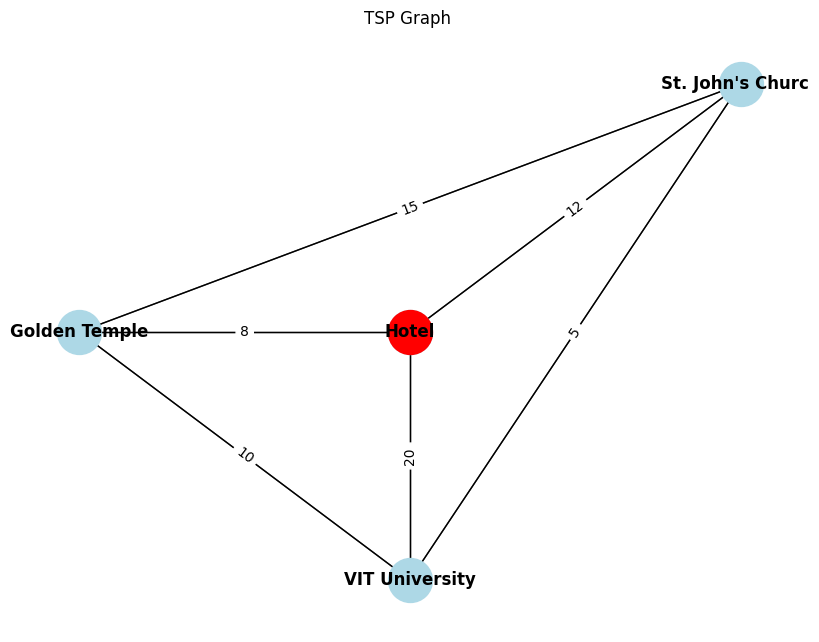

In [7]:
# Draw the graph with Matplotlib
plt.figure(figsize=(8, 6))  # Create a new figure for the plot
pos = nx.get_node_attributes(G, 'pos')  # Get the positions of the nodes in the graph

# Draw the graph with labels, node colors, and sizes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold')

# Draw the edges of the graph
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)

# Add labels to the edges displaying the weights (distances)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Highlight the starting and ending node (in this case, "Hotel") by changing its color to red
nx.draw_networkx_nodes(G, pos, nodelist=["Hotel"], node_color='red', node_size=1000)

# Set the title of the plot
plt.title('TSP Graph ')

# Display the plot
plt.show()

In [8]:

# Use D-Wave's library to solve the TSP. The traveling_salesperson function finds the optimal tour.
# Here, we specify the start and end node as "Hotel" to indicate that the tour should start and end at the Hotel node.
tour = dnx.traveling_salesperson(G, dimod.ExactSolver(), start="Hotel")

# Print the optimal tour found by the solver
print("Optimal Tour:", tour)

Optimal Tour: ['Hotel', "St. John's Church", 'VIT University', 'Golden Temple']


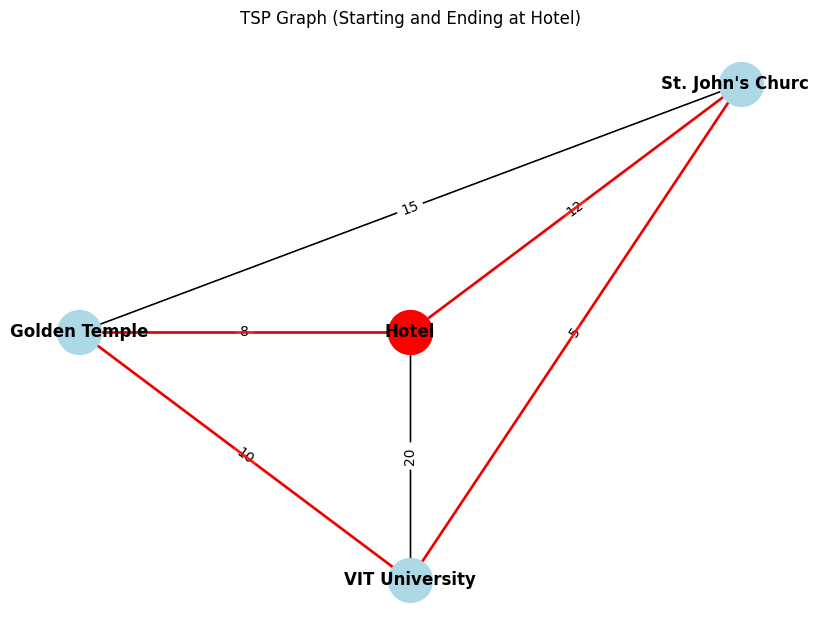

In [9]:
# Convert the tour nodes to a list of edges
tour_edges = [(tour[i], tour[i + 1]) for i in range(len(tour) - 1)] + [(tour[-1], tour[0])]

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_nodes(G, pos, nodelist=["Hotel"], node_color='red', node_size=1000)

# Highlight the optimal tour (resultant edge) in a different color (e.g., green)
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=2.0, alpha=0.9, edge_color='red')

plt.title('TSP Graph (Starting and Ending at Hotel)')
plt.show()

#How to solve in Quantum Annealer

In [10]:
!pip install dwave.system

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.6/305.6 kB 28.7 MB/s eta 0:00:00


In [11]:
qubo = dnx.algorithms.independent_set.maximum_weighted_independent_set_qubo(G)
print(qubo)

{('Golden Temple', 'Golden Temple'): -1.0, ('VIT University', 'VIT University'): -1.0, ("St. John's Church", "St. John's Church"): -1.0, ('Hotel', 'Hotel'): -1.0, ('Golden Temple', 'VIT University'): 2.0, ('Golden Temple', "St. John's Church"): 2.0, ('Golden Temple', 'Hotel'): 2.0, ('VIT University', "St. John's Church"): 2.0, ('VIT University', 'Hotel'): 2.0, ("St. John's Church", 'Hotel'): 2.0}


In [12]:
bqm = dimod.BQM.from_qubo(qubo)
print(bqm)

BinaryQuadraticModel({'Golden Temple': -1.0, 'VIT University': -1.0, "St. John's Church": -1.0, 'Hotel': -1.0}, {('VIT University', 'Golden Temple'): 2.0, ("St. John's Church", 'Golden Temple'): 2.0, ("St. John's Church", 'VIT University'): 2.0, ('Hotel', 'Golden Temple'): 2.0, ('Hotel', 'VIT University'): 2.0, ('Hotel', "St. John's Church"): 2.0}, 0.0, 'BINARY')


In [13]:
from dwave.system import LeapHybridSampler

In [14]:
tour2 = dnx.traveling_salesperson(G, LeapHybridSampler(token='DEV-c713ce647394d83ba0f1f60b911f1128c17bad9d'), start="Hotel")
# Print the optimal tour found by the solver
print("Optimal Tour result from HybridSolver:", tour2)

Optimal Tour result from HybridSolver: ['Hotel', "St. John's Church", 'VIT University', 'Golden Temple']


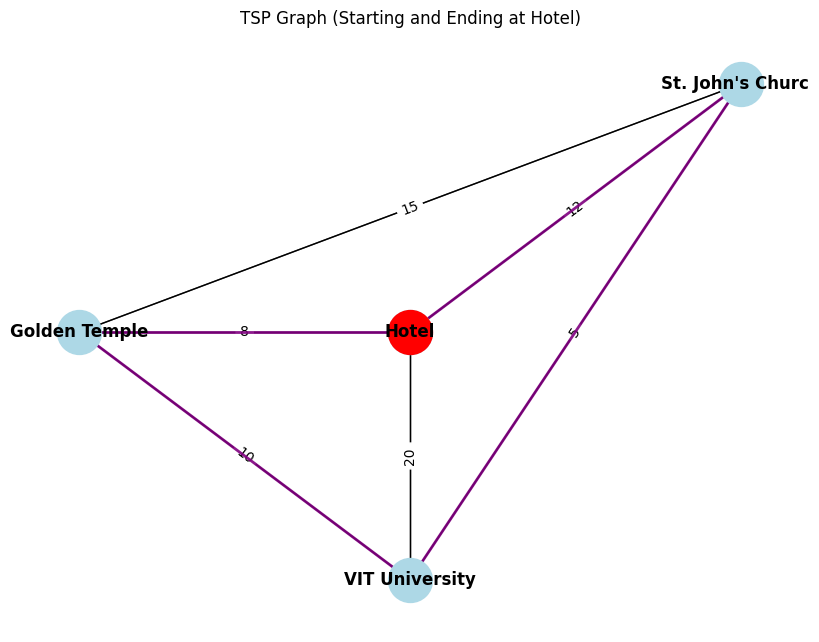

In [15]:
# Convert the tour nodes to a list of edges
tour_edges = [(tour2[i], tour2[i + 1]) for i in range(len(tour2) - 1)] + [(tour2[-1], tour2[0])]

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_nodes(G, pos, nodelist=["Hotel"], node_color='red', node_size=1000)

# Highlight the optimal tour (resultant edge) in a different color (e.g., green)
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=2.0, alpha=0.9, edge_color='purple')

plt.title('TSP Graph (Starting and Ending at Hotel)')
plt.show()

Authnetication didnt work try below

In [17]:
from getpass import *

In [ ]:
api_token=getpass('DEV-9def3cd459bf14aabe7785b177d33c17ae184fbc')